reco dark photon $Z_d(\rightarrow\mu^+\mu^-)$ as dsamuon-pair -- $\Delta R$ matching between ($Z_d$, dsamuon pair)

In [1]:
from rootpy.io import root_open
import os
from FireROOT.Analysis.Utils import *
from rootpy.plotting.style import set_style
from rootpy.plotting import Canvas, Efficiency, Legend

Welcome to JupyROOT 6.12/07


In [2]:
fn = os.path.join(os.getenv('CMSSW_BASE'), 'src/FireROOT/Analysis/python/outputs/rootfiles/slimTrees/recoZdToMu__TREE.root')
f = root_open(fn)
t=f.mulj
sorted(t.branchnames)

['dp_daudr',
 'dp_eta',
 'dp_lxy',
 'dp_lz',
 'dp_pt',
 'dsa_m_extrpdr',
 'dsa_m_gendr',
 'dsa_m_ncschits',
 'dsa_m_ndthits',
 'dsa_m_normchi2',
 'dsa_m_nsta',
 'dsa_m_pt',
 'dsa_m_pterrptinv',
 'dsa_m_samesign',
 'dsa_p_extrpdr',
 'dsa_p_gendr',
 'dsa_p_ncschits',
 'dsa_p_ndthits',
 'dsa_p_normchi2',
 'dsa_p_nsta',
 'dsa_p_pt',
 'dsa_p_pterrptinv',
 'dsa_p_samesign',
 'dsa_pm_pt',
 'dsa_pm_same',
 'genmu_m_eta',
 'genmu_m_pt',
 'genmu_p_eta',
 'genmu_p_pt',
 'lj_gendr',
 'lj_ndsa',
 'lj_pt',
 'lj_type',
 'mu_m_gendr',
 'mu_m_pt',
 'mu_m_samesign',
 'mu_m_selector',
 'mu_m_type',
 'mu_p_gendr',
 'mu_p_pt',
 'mu_p_samesign',
 'mu_p_selector',
 'mu_p_type',
 'mu_pm_pt',
 'mu_pm_same',
 's_LXY',
 's_MA',
 's_MXX']

In [3]:
set_style(MyStyle())
canvas = Canvas(500, 400)

INFO:rootpy.plotting.style] using ROOT style 'CMSTDR'


## reco -- DSA pair

In [4]:
dplxy_total  = t.Draw(t.b.dp_lxy>>('dplxy_total', 500, 0, 750))
dplxy_passed = t.Draw(t.b.dp_lxy>>('dplxy_passed', 500, 0, 750), 'dsa_m_gendr>0&dsa_p_gendr>0&dsa_pm_same==0')

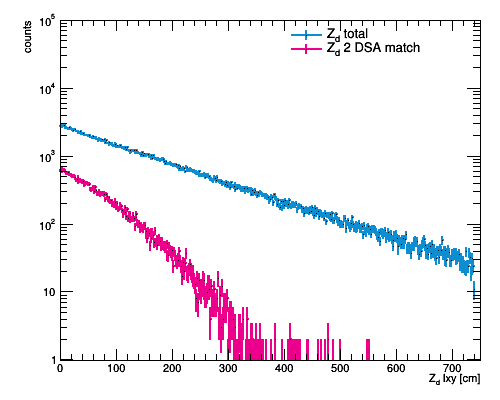

In [5]:
canvas.clear()

dplxy_total .linecolor=sigCOLORS[0]
dplxy_total .linewidth=2
dplxy_passed.linecolor=sigCOLORS[1]
dplxy_passed.linewidth=2

draw([dplxy_total, dplxy_passed,],
     pad=canvas, logy=True, ylimits=(1,1e5), xtitle='Z_{d} lxy [cm]', ytitle='counts')
leg = Legend(2, margin=0.25, leftmargin=0.45,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(dplxy_total, 'Z_{d} total', 'LEP')
leg.AddEntry(dplxy_passed, 'Z_{d} 2 DSA match', 'LEP')
leg.Draw()
canvas.draw()

In [6]:
mueffi_g = Efficiency(dplxy_passed, dplxy_total).graph

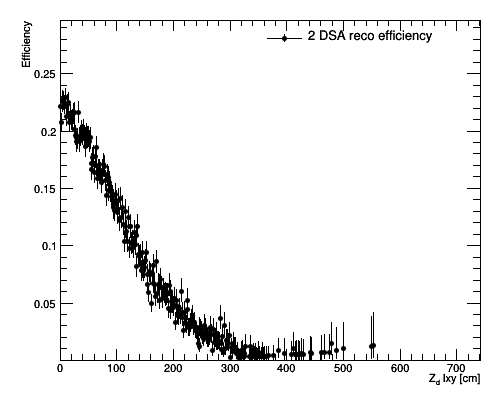

In [7]:
canvas.clear()

mueffi_g.drawstyle='APZ'
mueffi_g.markercolor=sigCOLORS[2]
mueffi_g.linecolor=sigCOLORS[2]
mueffi_g.markersize=0.5


draw([mueffi_g], xtitle='Z_{d} lxy [cm]', ytitle='Efficiency')
leg = Legend(1, margin=0.25, leftmargin=0.4,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(mueffi_g, '2 DSA reco efficiency', 'LEP')
leg.Draw()
canvas.draw()

In [8]:
dplz_total  = t.Draw(abs(t.b.dp_lz)>>('dplz_total', 500, 0, 750))
dplz_passed = t.Draw(abs(t.b.dp_lz)>>('dplz_passed', 500, 0, 750), 'dsa_m_gendr>0&dsa_p_gendr>0&dsa_pm_same==0')

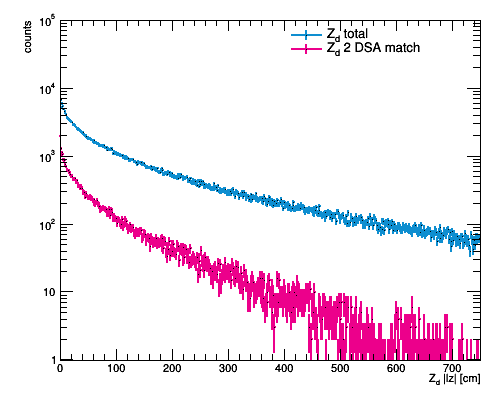

In [9]:
canvas.clear()

dplz_total .linecolor=sigCOLORS[0]
dplz_total .linewidth=2
dplz_passed.linecolor=sigCOLORS[1]
dplz_passed.linewidth=2

draw([dplz_total, dplz_passed,],
     pad=canvas, logy=True, ylimits=(1,1e5), xtitle='Z_{d} |lz| [cm]', ytitle='counts')
leg = Legend(2, margin=0.25, leftmargin=0.45,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(dplz_total, 'Z_{d} total', 'LEP')
leg.AddEntry(dplz_passed, 'Z_{d} 2 DSA match', 'LEP')
leg.Draw()
canvas.draw()

In [10]:
mueffi_lzg = Efficiency(dplz_passed, dplz_total).graph

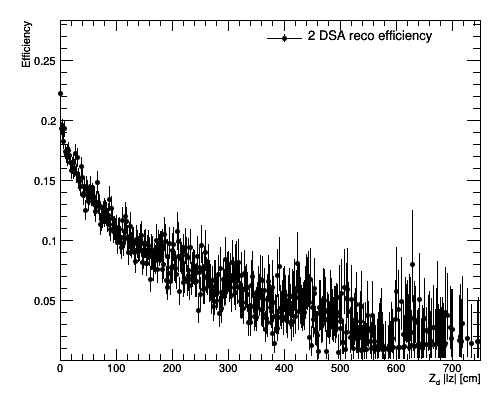

In [11]:
canvas.clear()

mueffi_lzg.drawstyle='APZ'
mueffi_lzg.markercolor=sigCOLORS[2]
mueffi_lzg.linecolor=sigCOLORS[2]
mueffi_lzg.markersize=0.5


draw([mueffi_lzg], xtitle='Z_{d} |lz| [cm]', ytitle='Efficiency')
leg = Legend(1, margin=0.25, leftmargin=0.4,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(mueffi_lzg, '2 DSA reco efficiency', 'LEP')
leg.Draw()
canvas.draw()

In [14]:
gendr_p = t.Draw('dsa_p_gendr', 'dsa_p_gendr>0&dsa_pm_same==0')
gendr_m = t.Draw('dsa_m_gendr', 'dsa_m_gendr>0&dsa_pm_same==0')

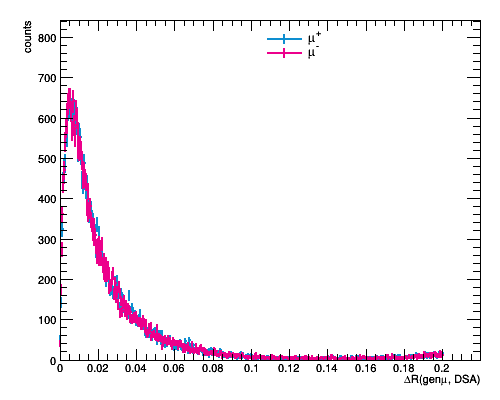

In [15]:
canvas.clear()

gendr_p.color=sigCOLORS[0]
gendr_p.linewidth=2
gendr_m.color=sigCOLORS[1]
gendr_m.linewidth=2

draw([gendr_p, gendr_m], pad=canvas, xtitle='#DeltaR(gen#mu, DSA)', ytitle='counts')
leg = Legend(2, margin=0.25, leftmargin=0.4,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(gendr_p, '#mu^{+}', 'LEP')
leg.AddEntry(gendr_m, '#mu^{-}', 'LEP')
leg.Draw()
canvas.draw()

In [31]:
ptreso_p = t.Draw('(dsa_p_pt-genmu_p_pt)/genmu_p_pt>>ptreso_p(100, -1, 3)', 'dsa_p_gendr>0&dsa_pm_same==0')
ptreso_m = t.Draw('(dsa_m_pt-genmu_m_pt)/genmu_m_pt>>ptreso_m(100, -1, 3)', 'dsa_m_gendr>0&dsa_pm_same==0')
ptreso_pm = t.Draw('(dsa_pm_pt-dp_pt)/dp_pt>>ptreso_pm(100, -1, 3)', 'dsa_m_gendr>0&dsa_p_gendr>0&dsa_pm_same==0')

print   (ptreso_p.get_mean(), ptreso_p.get_std_dev())
print   (ptreso_m.get_mean(), ptreso_m.get_std_dev())
print   (ptreso_pm.get_mean(), ptreso_pm.get_std_dev())

ptreso_p = ptreso_p.merge_bins([(0,1), (-2,-1)])
ptreso_m = ptreso_m.merge_bins([(0,1), (-2,-1)])
ptreso_pm = ptreso_pm.merge_bins([(0,1), (-2,-1)])

(0.6774573105948792, 11.842093919018891)
(0.898491174120007, 49.86718064978755)
(0.698576271000938, 24.725353911836276)


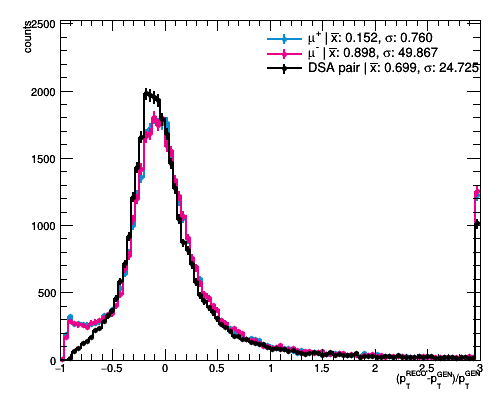

In [32]:
canvas.clear()

hs = [ptreso_p, ptreso_m, ptreso_pm]
for i,h in enumerate(hs):
    h.color=sigCOLORS[i]
    h.linewidth=2
    h.drawstyle='HIST E'
    h.fillstyle=0
    h.markersize=0.5

draw(hs[:], pad=canvas, xtitle='(p^{RECO}_{T}-p^{GEN}_{T})/p^{GEN}_{T}', ytitle='counts')
leg = Legend(3, margin=0.25, leftmargin=0.4,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(ptreso_p, '#mu^{+} | #bar{x}: %.3f, #sigma: %.3f' % (ptreso_p.get_mean(), ptreso_p.get_std_dev()), 'LEP')
leg.AddEntry(ptreso_m, '#mu^{-} | #bar{x}: %.3f, #sigma: %.3f' % (ptreso_m.get_mean(), ptreso_m.get_std_dev()), 'LEP')
leg.AddEntry(ptreso_pm, 'DSA pair | #bar{x}: %.3f, #sigma: %.3f' % (ptreso_pm.get_mean(), ptreso_pm.get_std_dev()), 'LEP')
leg.Draw()
canvas.draw()

In [45]:
extrpdr_p = t.Draw('dsa_p_extrpdr>>dsa_p_extrpdr(100, 0, 3)', 'dp_lxy>70&dsa_p_gendr>0&dsa_pm_same==0')
extrpdr_m = t.Draw('dsa_m_extrpdr>>dsa_m_extrpdr(100, 0, 3)', 'dp_lxy>70&dsa_m_gendr>0&dsa_pm_same==0')

extrpdr_p = extrpdr_p.merge_bins([(0,1), (-2,-1)])
extrpdr_m = extrpdr_m.merge_bins([(0,1), (-2,-1)])

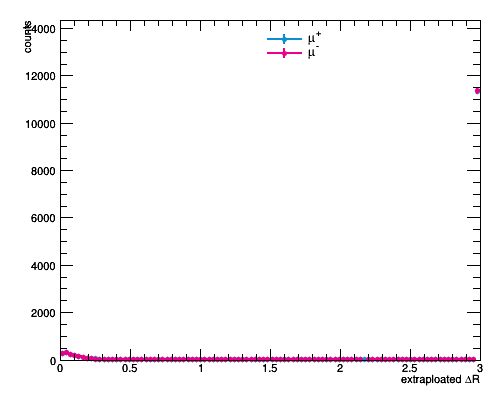

In [47]:
canvas.clear()

hs = [extrpdr_p, extrpdr_m]
for i,h in enumerate(hs):
    h.color=sigCOLORS[i]
    h.linewidth=2
    h.markersize=0.5

draw(hs[:], pad=canvas, xtitle='extraploated #DeltaR', ytitle='counts')
leg = Legend(2, margin=0.25, leftmargin=0.4,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(extrpdr_p, '#mu^{+}', 'LEP')
leg.AddEntry(extrpdr_m, '#mu^{-}', 'LEP')
leg.Draw()
canvas.Draw()

DSA ID

In [48]:
DSAID_P = 'dsa_p_normchi2<4&dsa_p_nsta>=2&(dsa_p_ndthits+dsa_p_ncschits)>12&dsa_p_pterrptinv<1&(dsa_p_ndthits>18|dsa_p_ncschits>0)'
DSAID_M = 'dsa_m_normchi2<4&dsa_m_nsta>=2&(dsa_m_ndthits+dsa_m_ncschits)>12&dsa_m_pterrptinv<1&(dsa_m_ndthits>18|dsa_m_ncschits>0)'

In [49]:
ptreso_p = t.Draw('(dsa_p_pt-genmu_p_pt)/genmu_p_pt>>ptreso_p(100, -1, 3)', DSAID_P+'&dsa_p_gendr>0&dsa_pm_same==0')
ptreso_m = t.Draw('(dsa_m_pt-genmu_m_pt)/genmu_m_pt>>ptreso_m(100, -1, 3)', DSAID_M+'&dsa_m_gendr>0&dsa_pm_same==0')
ptreso_pm = t.Draw('(dsa_pm_pt-dp_pt)/dp_pt>>ptreso_pm(100, -1, 3)', DSAID_P+'&'+DSAID_M+'&dsa_m_gendr>0&dsa_p_gendr>0&dsa_pm_same==0')

print   (ptreso_p.get_mean(), ptreso_p.get_std_dev())
print   (ptreso_m.get_mean(), ptreso_m.get_std_dev())
print   (ptreso_pm.get_mean(), ptreso_pm.get_std_dev())

ptreso_p = ptreso_p.merge_bins([(0,1), (-2,-1)])
ptreso_m = ptreso_m.merge_bins([(0,1), (-2,-1)])
ptreso_pm = ptreso_pm.merge_bins([(0,1), (-2,-1)])

(0.11333060489751483, 1.0598461649704867)
(0.13561315012021985, 1.288699732475413)
(0.005984364781730316, 0.41748021607359387)


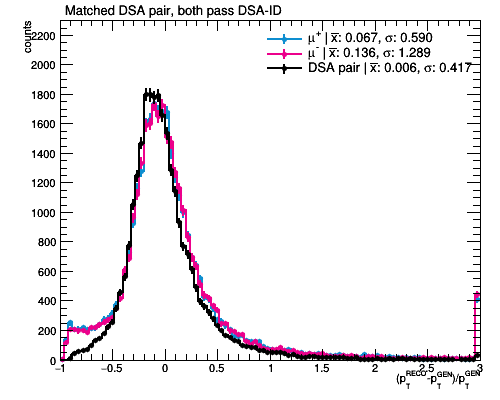

In [53]:
canvas.clear()

hs = [ptreso_p, ptreso_m, ptreso_pm]
for i,h in enumerate(hs):
    h.color=sigCOLORS[i]
    h.linewidth=2
    h.drawstyle='HIST E'
    h.fillstyle=0
    h.markersize=0.5

draw(hs[:], pad=canvas, xtitle='(p^{RECO}_{T}-p^{GEN}_{T})/p^{GEN}_{T}', ytitle='counts')
leg = Legend(3, margin=0.25, leftmargin=0.4,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(ptreso_p, '#mu^{+} | #bar{x}: %.3f, #sigma: %.3f' % (ptreso_p.get_mean(), ptreso_p.get_std_dev()), 'LEP')
leg.AddEntry(ptreso_m, '#mu^{-} | #bar{x}: %.3f, #sigma: %.3f' % (ptreso_m.get_mean(), ptreso_m.get_std_dev()), 'LEP')
leg.AddEntry(ptreso_pm, 'DSA pair | #bar{x}: %.3f, #sigma: %.3f' % (ptreso_pm.get_mean(), ptreso_pm.get_std_dev()), 'LEP')
leg.Draw()
title=TitleAsLatex('Matched DSA pair, both pass DSA-ID')
title.Draw()
canvas.draw()

In [56]:
extrpdr_p = t.Draw('dsa_p_extrpdr>>dsa_p_extrpdr(100, 0, 3)', DSAID_P+'&dp_lxy>70&dsa_p_gendr>0&dsa_pm_same==0')
extrpdr_m = t.Draw('dsa_m_extrpdr>>dsa_m_extrpdr(100, 0, 3)', DSAID_M+'&dp_lxy>70&dsa_m_gendr>0&dsa_pm_same==0')

extrpdr_p = extrpdr_p.merge_bins([(0,1), (-2,-1)])
extrpdr_m = extrpdr_m.merge_bins([(0,1), (-2,-1)])

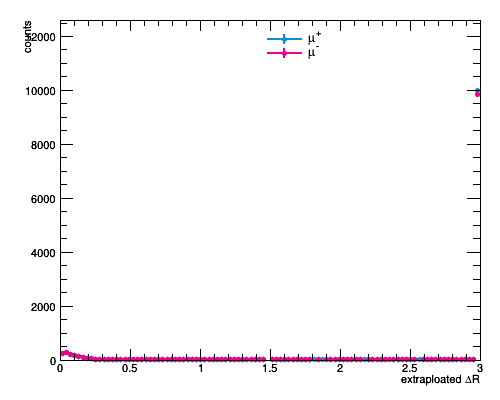

In [57]:
canvas.clear()

hs = [extrpdr_p, extrpdr_m]
for i,h in enumerate(hs):
    h.color=sigCOLORS[i]
    h.linewidth=2
    h.markersize=0.5

draw(hs[:], pad=canvas, xtitle='extraploated #DeltaR', ytitle='counts')
leg = Legend(2, margin=0.25, leftmargin=0.4,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(extrpdr_p, '#mu^{+}', 'LEP')
leg.AddEntry(extrpdr_m, '#mu^{-}', 'LEP')
leg.Draw()
canvas.Draw()